In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanicDF = pd.read_csv('../data/titanic_train.csv')

In [3]:
titanicDF.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
titanicDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanicDF['Age'].fillna(titanicDF['Age'].mean(), inplace=True)
titanicDF['Cabin'].fillna('N',inplace=True)
titanicDF['Embarked'].fillna('N',inplace=True)
print('데이터셋 Null 값 개수 ', titanicDF.isnull().sum())

데이터셋 Null 값 개수  PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [6]:
print('Sex 값 분포 : \n', titanicDF['Sex'].value_counts())
print('\n Cabin 값 분포 : \n', titanicDF['Cabin'].value_counts())
print('\n Embarked 값 분포 : \n', titanicDF['Embarked'].value_counts())

Sex 값 분포 : 
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포 : 
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포 : 
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [7]:
titanicDF['Cabin'] = titanicDF['Cabin'].str[:1]
titanicDF['Cabin'].head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

In [8]:
titanicDF.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

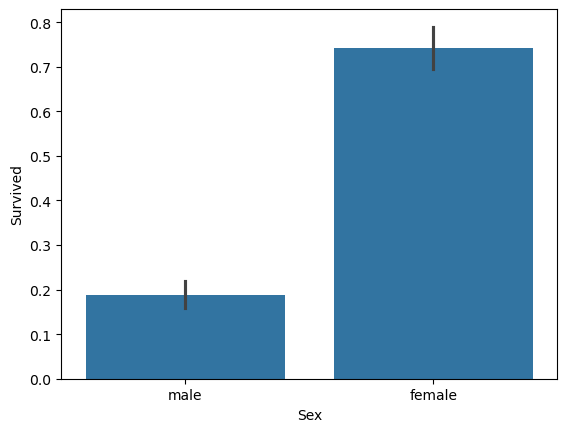

In [9]:
sns.barplot(x='Sex', y='Survived', data = titanicDF)

<Axes: xlabel='Pclass', ylabel='Survived'>

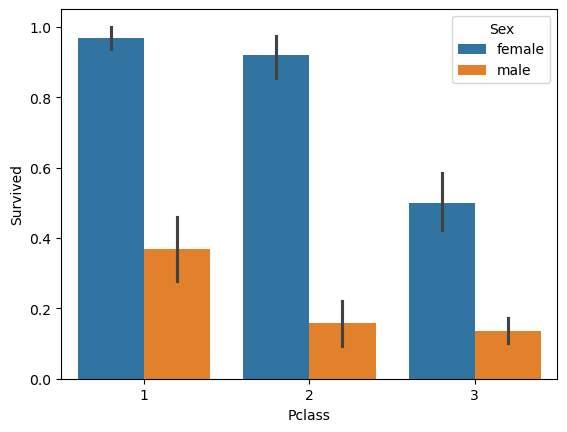

In [10]:
sns.barplot(x='Pclass',y='Survived', hue = 'Sex', data=titanicDF)

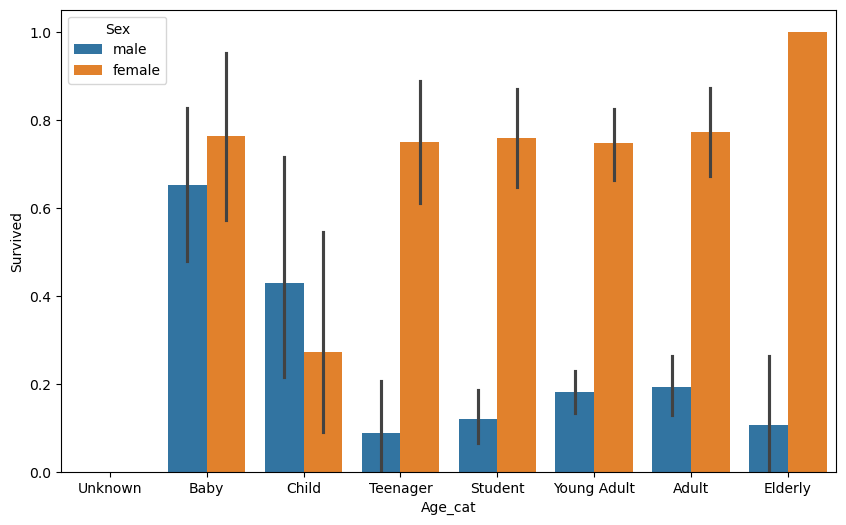

In [11]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DF의 apply lambda 식에 사용.
def get_category(age):
    cat = ''
    if age<=-1: cat='Unknown'
    elif age<=5: cat='Baby'
    elif age<=12: cat='Child'
    elif age<=18: cat='Teenager'
    elif age<=25: cat='Student'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Adult'
    else: cat='Elderly'

    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

group_names =['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

titanicDF['Age_cat'] = titanicDF['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanicDF, order=group_names)
titanicDF.drop('Age_cat', axis=1, inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Canin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

        
    return dataDF

titanicDF= encode_features(titanicDF)
titanicDF.head()

KeyError: 'Canin'